In [1]:
import jax

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('../')

In [3]:

import hmac
import matplotlib.pyplot as plt
from src.HMC_Single_Star_cosdist import HMC_Sampler
from src import NF_Cos_dist
import jax.numpy as jnp
import numpy as np
import matplotlib.colors as mcolors
import jax.numpy as jnp
import jax.random as jr
nf=NF_Cos_dist.JaxNormFlow()

hmc=HMC_Sampler()

/opt/homebrew/Caskroom/miniforge/base/envs/flowjax/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:jax._src.xla_bridge:Unable to initialize backend 'cuda': 
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: dlopen(libtpu.so, 0x0001): tried: 'libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibtpu.so' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/flowjax/bin/../lib/libtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache), 'libtpu.so' (no such file), '/usr/local/lib/libtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache)


8164992
7558434
8164992
7558434


In [4]:
z=jax.random.normal(jax.random.PRNGKey(0),shape=(10000,12))

In [5]:
import scipy.stats
p=scipy.stats.multivariate_normal(jnp.zeros_like(z[0])).logpdf(z)

In [6]:
outs=jax.vmap(nf.flow.bijection.transform)(z)+nf.mean

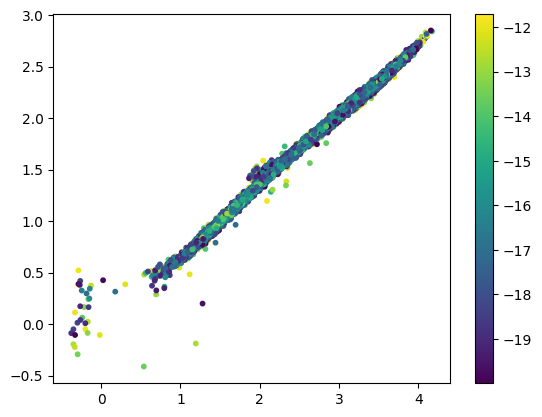

In [7]:
plt.scatter(outs[:,2][p<-20],outs[:,4][p<-20],c=p[p<-20],s=10)
plt.scatter(outs[:,2][p>-20],outs[:,4][p>-20],c=p[p>-20],s=10)

plt.colorbar()


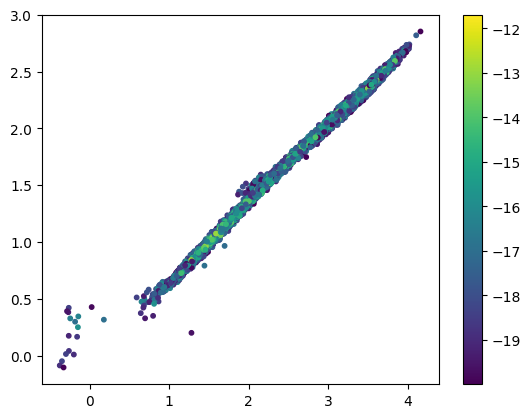

In [8]:
plt.scatter(outs[:,2][p>-20],outs[:,4][p>-20],c=p[p>-20],s=10)
plt.colorbar()


In [9]:
lp=nf.flow.log_prob(jax.vmap(nf.flow.bijection.transform)(z))

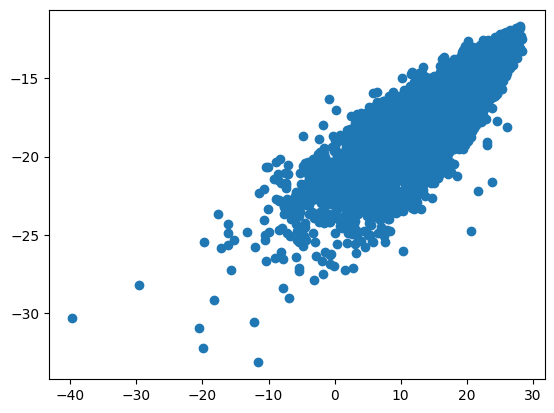

In [10]:
plt.scatter(lp,p)